In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier


In [3]:
train_data = pd.read_csv("train_dataset.csv")
train_data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0


In [4]:
train_data.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             28
satisfaction                          0
dtype: int64

In [5]:
train_data.dropna(inplace=True)

In [6]:
train_data.shape

(9972, 24)

In [7]:
train_data.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.00000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000
mean,5001.290112,39.367730,1229.401324,2.779382,3.064380,2.797132,2.980846,3.215002,3.348375,3.492680,3.404031,3.454473,3.416667,3.674890,3.36071,3.679803,3.312074,14.323406,14.709888,0.500000
std,2885.685990,14.885497,1022.402516,1.363178,1.527427,1.421520,1.283711,1.333063,1.353250,1.310813,1.331863,1.273789,1.308258,1.190508,1.25823,1.175102,1.311285,39.547671,40.046355,0.500025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2503.750000,27.000000,420.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.00000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,5000.500000,40.000000,863.500000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.00000,4.000000,3.000000,0.000000,0.000000,0.500000
75%,7500.250000,51.000000,1809.250000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.00000,5.000000,4.000000,12.000000,12.000000,1.000000
max,10000.000000,80.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,921.000000,924.000000,1.000000


In [8]:
train_data.Gender.value_counts()

Female    5158
Male      4814
Name: Gender, dtype: int64

In [9]:
train_data.satisfaction.value_counts()

0    4986
1    4986
Name: satisfaction, dtype: int64

In [10]:
train_data["Customer Type"].value_counts()

Loyal Customer       8283
disloyal Customer    1689
Name: Customer Type, dtype: int64

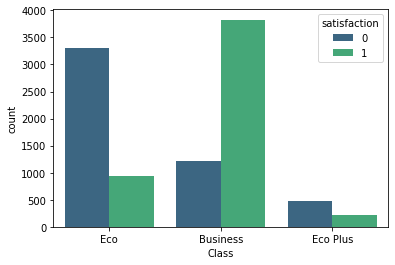

In [11]:

sns.countplot(x='Class', hue='satisfaction', palette='viridis', data=train_data)


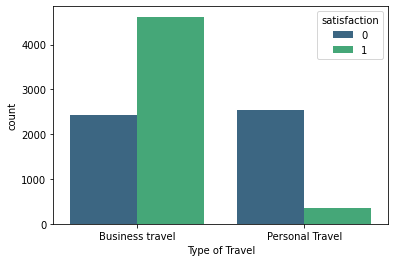

In [12]:

sns.countplot(x='Type of Travel', hue='satisfaction', palette='viridis', data=train_data)


In [13]:
train_data.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [14]:
train_data.corrwith(train_data["satisfaction"])

id                                   0.002581
Age                                  0.145327
Flight Distance                      0.298484
Inflight wifi service                0.277497
Departure/Arrival time convenient   -0.067758
Ease of Online booking               0.164025
Gate location                        0.007422
Food and drink                       0.206881
Online boarding                      0.504671
Seat comfort                         0.342061
Inflight entertainment               0.401109
On-board service                     0.327361
Leg room service                     0.325405
Baggage handling                     0.248839
Checkin service                      0.232337
Inflight service                     0.240580
Cleanliness                          0.310046
Departure Delay in Minutes          -0.043456
Arrival Delay in Minutes            -0.048650
satisfaction                         1.000000
dtype: float64

In [15]:
df = train_data.drop(["id", "Gate location", "Arrival Delay in Minutes", "Departure Delay in Minutes", "Departure/Arrival time convenient"], axis=1)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,Male,disloyal Customer,33,Business travel,Eco,571,2,2,4,2,4,4,3,1,3,4,3,4,0
1,Female,Loyal Customer,49,Business travel,Business,1431,4,4,3,5,4,5,5,5,5,3,5,3,1
2,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,3,1,1,1,1,1,1,2,0
3,Female,Loyal Customer,27,Business travel,Business,1550,3,3,2,2,2,2,4,4,5,5,4,2,1
4,Male,Loyal Customer,11,Personal Travel,Eco,526,3,3,4,3,4,4,5,2,5,3,5,4,0


In [16]:
df.corrwith(train_data["satisfaction"])


Age                       0.145327
Flight Distance           0.298484
Inflight wifi service     0.277497
Ease of Online booking    0.164025
Food and drink            0.206881
Online boarding           0.504671
Seat comfort              0.342061
Inflight entertainment    0.401109
On-board service          0.327361
Leg room service          0.325405
Baggage handling          0.248839
Checkin service           0.232337
Inflight service          0.240580
Cleanliness               0.310046
satisfaction              1.000000
dtype: float64

In [17]:
# df["all_services"] = df['Inflight wifi service'] + df['Ease of Online booking'] + df["Online boarding"] + df['Seat comfort'] + df["Inflight entertainment"] + df["Food and drink"] + df["On-board service"] + df['Leg room service'] + df["Leg room service"] + df['Baggage handling'] + df["Checkin service"] + df["Inflight service"] + df["Cleanliness"]
# df.head()

In [19]:
df.corrwith(df["satisfaction"]).sort_values(ascending=False)

satisfaction              1.000000
Online boarding           0.504671
Inflight entertainment    0.401109
Seat comfort              0.342061
On-board service          0.327361
Leg room service          0.325405
Cleanliness               0.310046
Flight Distance           0.298484
Inflight wifi service     0.277497
Baggage handling          0.248839
Inflight service          0.240580
Checkin service           0.232337
Food and drink            0.206881
Ease of Online booking    0.164025
Age                       0.145327
dtype: float64

In [20]:
df.drop(["Ease of Online booking","Age"], axis=1, inplace=True)

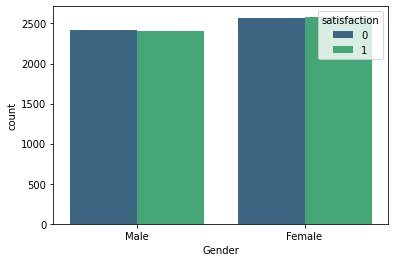

In [21]:
sns.countplot(x='Gender', hue='satisfaction', palette='viridis', data=train_data)


In [22]:
df.corrwith(df.satisfaction)

Flight Distance           0.298484
Inflight wifi service     0.277497
Food and drink            0.206881
Online boarding           0.504671
Seat comfort              0.342061
Inflight entertainment    0.401109
On-board service          0.327361
Leg room service          0.325405
Baggage handling          0.248839
Checkin service           0.232337
Inflight service          0.240580
Cleanliness               0.310046
satisfaction              1.000000
dtype: float64

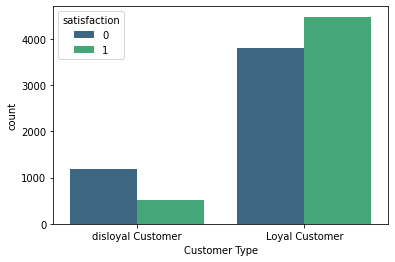

In [23]:
sns.countplot(x='Customer Type', hue='satisfaction', palette='viridis', data=train_data)

In [24]:
df.columns

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Food and drink', 'Online boarding',
       'Seat comfort', 'Inflight entertainment', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Inflight service', 'Cleanliness', 'satisfaction'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0aa622bf10>,
      dtype=object)

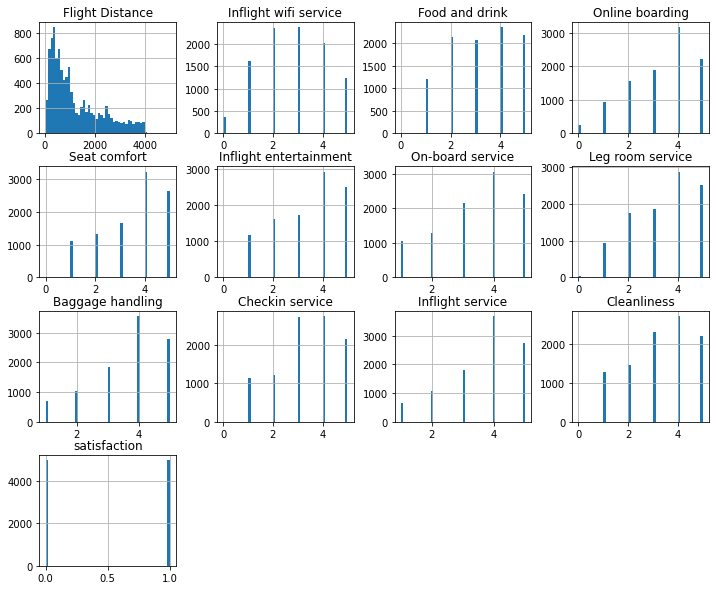

In [25]:
df.hist(bins=50, figsize=(12,10))

In [26]:
df.corrwith(df.satisfaction)

Flight Distance           0.298484
Inflight wifi service     0.277497
Food and drink            0.206881
Online boarding           0.504671
Seat comfort              0.342061
Inflight entertainment    0.401109
On-board service          0.327361
Leg room service          0.325405
Baggage handling          0.248839
Checkin service           0.232337
Inflight service          0.240580
Cleanliness               0.310046
satisfaction              1.000000
dtype: float64

In [27]:
df.head()

,Gender,Customer Type,Type of Travel,Class,Flight Distance,Inflight wifi service,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,Male,disloyal Customer,Business travel,Eco,571,2,4,2,4,4,3,1,3,4,3,4,0
1,Female,Loyal Customer,Business travel,Business,1431,4,3,5,4,5,5,5,5,3,5,3,1
2,Female,Loyal Customer,Business travel,Eco,867,1,4,4,3,1,1,1,1,1,1,2,0
3,Female,Loyal Customer,Business travel,Business,1550,3,2,2,2,2,4,4,5,5,4,2,1
4,Male,Loyal Customer,Personal Travel,Eco,526,3,4,3,4,4,5,2,5,3,5,4,0


In [28]:
X, y = df.drop("satisfaction", axis=1), df["satisfaction"]
X.head()

,Gender,Customer Type,Type of Travel,Class,Flight Distance,Inflight wifi service,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,Male,disloyal Customer,Business travel,Eco,571,2,4,2,4,4,3,1,3,4,3,4
1,Female,Loyal Customer,Business travel,Business,1431,4,3,5,4,5,5,5,5,3,5,3
2,Female,Loyal Customer,Business travel,Eco,867,1,4,4,3,1,1,1,1,1,1,2
3,Female,Loyal Customer,Business travel,Business,1550,3,2,2,2,2,4,4,5,5,4,2
4,Male,Loyal Customer,Personal Travel,Eco,526,3,4,3,4,4,5,2,5,3,5,4


In [20]:
# customer_type_data = pd.get_dummies(df["Customer Type"])
# gender_data = pd.get_dummies(df["Gender"])
# type_of_travel_data = pd.get_dummies(df["Type of Travel"])
# class_data = pd.get_dummies(df["Class"])


In [29]:
# df2 = df.drop(["Customer Type", "Gender", "Type of Travel", "Class"], axis=1)
# df2.head()

In [30]:
df.columns

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Food and drink', 'Online boarding',
       'Seat comfort', 'Inflight entertainment', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Inflight service', 'Cleanliness', 'satisfaction'],
      dtype='object')

In [31]:
X.head()

,Gender,Customer Type,Type of Travel,Class,Flight Distance,Inflight wifi service,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,Male,disloyal Customer,Business travel,Eco,571,2,4,2,4,4,3,1,3,4,3,4
1,Female,Loyal Customer,Business travel,Business,1431,4,3,5,4,5,5,5,5,3,5,3
2,Female,Loyal Customer,Business travel,Eco,867,1,4,4,3,1,1,1,1,1,1,2
3,Female,Loyal Customer,Business travel,Business,1550,3,2,2,2,2,4,4,5,5,4,2
4,Male,Loyal Customer,Personal Travel,Eco,526,3,4,3,4,4,5,2,5,3,5,4


In [32]:
test_data = pd.read_csv("test_dataset.csv")
test_data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Female,Loyal Customer,25,Personal Travel,Eco,2704,2,2,2,...,5,2,4,4,3,5,1,5,152,191.0
1,2,Female,Loyal Customer,49,Business travel,Business,1623,1,1,1,...,4,2,2,2,2,4,2,3,60,52.0
2,3,Male,Loyal Customer,51,Business travel,Business,338,4,4,4,...,5,5,5,5,5,4,5,4,0,0.0
3,4,Male,Loyal Customer,34,Business travel,Eco Plus,95,0,0,0,...,1,5,4,4,1,3,3,5,0,0.0
4,5,Male,Loyal Customer,34,Personal Travel,Eco,602,4,4,4,...,5,5,4,5,4,5,5,5,130,140.0


In [33]:
# from sklearn.base import TransformerMixin, BaseEstimator

# f_distance_ix, wifi_ix, food_ix, boarding_ix, seat_ix, ent_ix, on_board_ix, leg_room_ix, baggage_ix, checkin_ix, inflight_ix, cleanliness_ix = 6,7,11,

# class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
#   def __init__(self, add_all_services = True):
#     self.add_all_sevices = add_all_services

#   def fit(self, X, y=None):
#     return self

#   def transform(self, X):
#     if self.add_all_services:
#       add_all_sefvices = X[: , bedrooms_ix] / X[:, households_ix]
#       return np.c_[X, rooms_per_house, population_per_household, bedrooms_per_room]
#     else:
#       return np.c_[X, rooms_per_house, population_per_household]

cat_data = ["Customer Type", "Gender", "Type of Travel", "Class"]
num_data = ["Flight Distance","Inflight wifi service","Food and drink","Online boarding","Seat comfort","Inflight entertainment","On-board service","Leg room service","Baggage handling","Checkin service","Inflight service","Cleanliness"]


full_pipeline = ColumnTransformer([
    ("cat_data", OneHotEncoder(), cat_data),
    ("std_scaler", StandardScaler(), num_data)
])

X = full_pipeline.fit_transform(X)
X

array([[ 0.        ,  1.        ,  0.        , ...,  0.50811208,
        -0.5785347 ,  0.52464608],
       [ 1.        ,  0.        ,  1.        , ..., -0.28669477,
         1.12352992, -0.23800271],
       [ 1.        ,  0.        ,  1.        , ..., -1.87630848,
        -2.28059931, -1.00065151],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.28669477,
         0.27249761, -0.23800271],
       [ 1.        ,  0.        ,  1.        , ...,  1.30291894,
         0.27249761,  1.28729488],
       [ 1.        ,  0.        ,  0.        , ..., -0.28669477,
         0.27249761,  1.28729488]])

In [34]:
pd.Series(train_data.columns)

0                                    id
1                                Gender
2                         Customer Type
3                                   Age
4                        Type of Travel
5                                 Class
6                       Flight Distance
7                 Inflight wifi service
8     Departure/Arrival time convenient
9                Ease of Online booking
10                        Gate location
11                       Food and drink
12                      Online boarding
13                         Seat comfort
14               Inflight entertainment
15                     On-board service
16                     Leg room service
17                     Baggage handling
18                      Checkin service
19                     Inflight service
20                          Cleanliness
21           Departure Delay in Minutes
22             Arrival Delay in Minutes
23                         satisfaction
dtype: object

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)
X_train

array([[ 1.        ,  0.        ,  0.        , ...,  0.50811208,
         1.12352992,  1.28729488],
       [ 1.        ,  0.        ,  0.        , ...,  1.30291894,
         1.12352992,  1.28729488],
       [ 1.        ,  0.        ,  0.        , ...,  0.50811208,
         0.27249761, -0.23800271],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -1.87630848,
         0.27249761,  1.28729488],
       [ 1.        ,  0.        ,  0.        , ..., -1.08150162,
         0.27249761,  0.52464608],
       [ 0.        ,  1.        ,  1.        , ...,  0.50811208,
        -0.5785347 , -1.76330031]])

In [36]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

LogisticRegression()

In [37]:
lr_predict = LR_model.predict(X_test)
lr_predict

array([0, 1, 1, ..., 0, 1, 1])

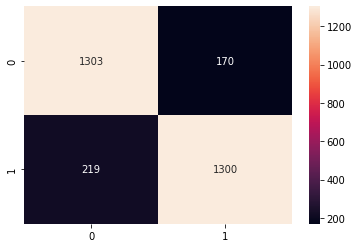

In [38]:

conf_mat = confusion_matrix(y_test, lr_predict)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show() 

In [39]:
print(classification_report(y_test, lr_predict))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1473
           1       0.88      0.86      0.87      1519

    accuracy                           0.87      2992
   macro avg       0.87      0.87      0.87      2992
weighted avg       0.87      0.87      0.87      2992



In [40]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
dt_predict = DT_model.predict(X_test)
dt_predict

array([0, 1, 1, ..., 0, 1, 1])

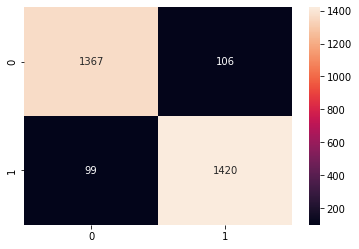

In [42]:
con_mat = confusion_matrix(y_test, dt_predict)
sns.heatmap(con_mat, annot=True, fmt="g")


In [43]:
print(classification_report(y_test, dt_predict))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1473
           1       0.93      0.93      0.93      1519

    accuracy                           0.93      2992
   macro avg       0.93      0.93      0.93      2992
weighted avg       0.93      0.93      0.93      2992



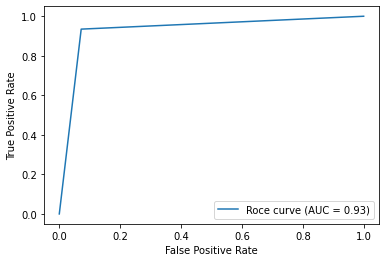

In [44]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, dt_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="Roce curve")
display.plot()

In [45]:
SV_model = SVC()
SV_model.fit(X_train, y_train)

SVC()

In [46]:
sv_predict = SV_model.predict(X_test)
sv_predict

array([0, 1, 1, ..., 0, 1, 1])

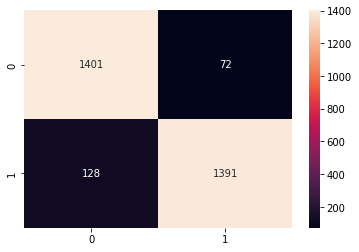

In [47]:
sv_mat = confusion_matrix(y_test, sv_predict)
sns.heatmap(sv_mat, annot=True, fmt="g")

In [48]:
print(classification_report(y_test, sv_predict))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1473
           1       0.95      0.92      0.93      1519

    accuracy                           0.93      2992
   macro avg       0.93      0.93      0.93      2992
weighted avg       0.93      0.93      0.93      2992



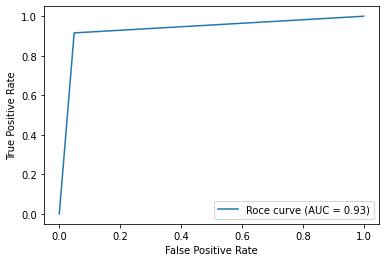

In [49]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, sv_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="Roce curve")
display.plot()

In [56]:
RF_model = RandomForestClassifier(n_estimators=79, random_state=0)
RF_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=79, random_state=0)

In [57]:
rf_predict = RF_model.predict(X_test)
rf_predict

array([0, 1, 1, ..., 0, 1, 1])

In [55]:
params_grid = {"n_estimators": range(1, 100)}

grid = GridSearchCV(RF_model, params_grid)

grid.fit(X_train, y_train)

print(grid.best_params_)

{'n_estimators': 79}


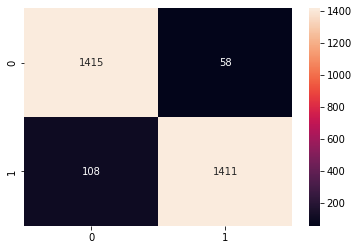

In [58]:
rf_mat = confusion_matrix(y_test, rf_predict)
sns.heatmap(rf_mat, annot=True, fmt="g")

In [59]:
print(classification_report(y_test, rf_predict))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1473
           1       0.96      0.93      0.94      1519

    accuracy                           0.94      2992
   macro avg       0.94      0.94      0.94      2992
weighted avg       0.95      0.94      0.94      2992



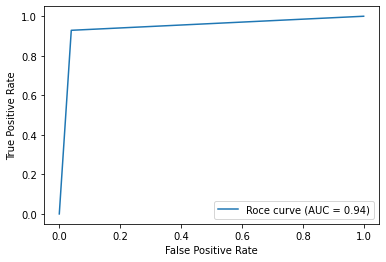

In [60]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="Roce curve")
display.plot()

In [61]:
xb_model = XGBClassifier()
xb_model.fit(X_train, y_train)

XGBClassifier()

In [62]:
xb_predict = xb_model.predict(X_test)
xb_predict

array([0, 1, 1, ..., 0, 1, 1])

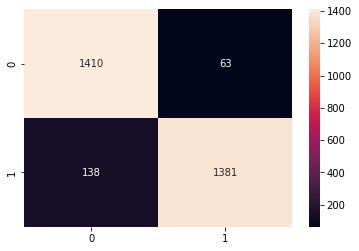

In [63]:
xb_mat = confusion_matrix(y_test, xb_predict)
sns.heatmap(xb_mat, annot=True, fmt="g")

In [64]:
print(classification_report(y_test, xb_predict))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1473
           1       0.96      0.91      0.93      1519

    accuracy                           0.93      2992
   macro avg       0.93      0.93      0.93      2992
weighted avg       0.93      0.93      0.93      2992



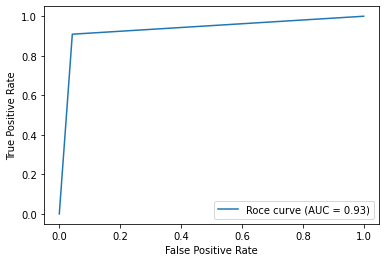

In [65]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, xb_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="Roce curve")
display.plot()

In [88]:
# As a conclusion random RandomForestClassifier has worked and predicted better than other models. 
# I decided to use that model for this classification problem

test_data.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             19
dtype: int64

In [70]:
X_test_prepared = full_pipeline.fit_transform(test_data)
X_test_prepared

array([[ 1.        ,  0.        ,  1.        , ...,  1.3243262 ,
        -2.26194287,  1.25053935],
       [ 1.        ,  0.        ,  1.        , ...,  0.52917387,
        -1.41777684, -0.26503629],
       [ 1.        ,  0.        ,  0.        , ...,  0.52917387,
         1.11472124,  0.49275153],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -1.06113078,
        -0.57361082, -1.02282411],
       [ 1.        ,  0.        ,  0.        , ..., -1.8562831 ,
        -0.57361082,  1.25053935],
       [ 0.        ,  1.        ,  1.        , ...,  0.52917387,
         1.11472124, -1.78061193]])

In [71]:
y_predicted = RF_model.predict(X_test_prepared)
y_predicted

array([0, 1, 1, ..., 0, 1, 0])

In [72]:
sample_submission = pd.read_csv("sample_submission.csv")
sample_submission.head()

,id,satisfaction
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [73]:
sample_submission["satisfaction"] = y_predicted
sample_submission.head()

,id,satisfaction
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0


In [74]:
sample_submission.to_csv("customer_satisfaction.csv", index=False)